# **Project Name**    - EMIPredict AI - Intelligent Financial Risk Assessment Platform

##### **Project Type**    -   Machine Learning, Data Analysis, MLflow
##### **Name**  - Gade Pavan Kumar Reddy

# **Project Summary -**

EMIPredict AI is a comprehensive financial risk assessment solution developed to streamline EMI-related decision-making through machine learning. Using a dataset of 400,000 financial records, the project addresses two ML problems: EMI eligibility classification and maximum EMI regression prediction. Multiple models such as Logistic Regression, Random Forest, and XGBoost are developed, evaluated, and managed via MLflow for tracking and comparison. The platform integrates feature engineering, financial ratio analysis, and robust preprocessing for high model accuracy. Deployed through Streamlit Cloud, the system provides an intuitive user interface for real-time predictions and visual insights. It empowers lenders to automate risk evaluation, enhance loan processing speed, and promote responsible borrowing through accurate financial profiling.

# **GitHub Link -**

https://github.com/pavangade31/EMI-Predict-AI-Project

# **Problem Statement**

The project aims to build an intelligent financial risk assessment platform using machine learning to predict EMI eligibility and the maximum EMI amount a customer can afford. Many individuals struggle with EMI payments due to poor financial planning and inadequate assessment of repayment capacity. This system integrates MLflow for experiment tracking and Streamlit for deployment, providing real-time, data-driven predictions that assist banks, fintech firms, and lending institutions in making accurate, automated, and fair loan approval decisions.

## 1. Data Loading and Understanding

### Import Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
import pickle
import json
import os
import joblib                                                                
from sklearn.preprocessing import StandardScaler                                       
from sklearn.preprocessing import LabelEncoder, OneHotEncoder                                       
from sklearn.model_selection import train_test_split                                                                  
from sklearn.linear_model import LogisticRegression                                    
from sklearn.ensemble import RandomForestClassifier                                                                          
from xgboost  import XGBClassifier                                                     
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score
from sklearn.linear_model import LinearRegression,  Ridge, Lasso                                                  
from sklearn.ensemble import RandomForestRegressor    
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from mlflow.tracking import MlflowClient
import tempfile

### Import Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [3]:
df = pd.read_csv("emi_prediction_dataset.csv")
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


### Dataset Rows and Columns Count

In [4]:
print(f"No of rows in dataset: {df.shape[0]}")
print(f"No of columns in dataset: {df.shape[1]}")

No of rows in dataset: 404800
No of columns in dataset: 27


### Intial Check for the Datatypes in the DataFrame

In [5]:
df.dtypes

age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object

### Missing Values

In [6]:
df.isnull().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

### Changing the Datasets Columns Name Lower Case To Upper Case

In [7]:
df.columns = df.columns.str.replace("_"," ").str.title()

In [8]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education', 'Monthly Salary',
       'Employment Type', 'Years Of Employment', 'Company Type', 'House Type',
       'Monthly Rent', 'Family Size', 'Dependents', 'School Fees',
       'College Fees', 'Travel Expenses', 'Groceries Utilities',
       'Other Monthly Expenses', 'Existing Loans', 'Current Emi Amount',
       'Credit Score', 'Bank Balance', 'Emergency Fund', 'Emi Scenario',
       'Requested Amount', 'Requested Tenure', 'Emi Eligibility',
       'Max Monthly Emi'],
      dtype='object')

### Changing the Mismatch Datatypes Columns

In [9]:
df['Age'] = pd.to_numeric(df['Age'] , errors='coerce')
df['Monthly Salary'] = pd.to_numeric(df['Monthly Salary'], errors='coerce')
df["Bank Balance"] = pd.to_numeric(df["Bank Balance"], errors='coerce')

### Filling the Null Values using Forward Fill

In [10]:
df[["Education", "Monthly Rent", "Credit Score", "Bank Balance", "Emergency Fund"]] = df[["Education", "Monthly Rent", "Credit Score", "Bank Balance", "Emergency Fund"]].fillna(method="ffill")

In [12]:
df[['Age', 'Monthly Salary']] = df[['Age', 'Monthly Salary']].fillna(df[['Age', 'Monthly Salary']].mean())

### Cleaning Gender Column

In [13]:
# Clean 'gender' column
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()

df['Gender'] = df['Gender'].replace({
    'm': 'Male', 'male': 'Male', 'male ': 'Male', 'MALE': 'Male',
    'f': 'Female', 'female': 'Female', 'female ': 'Female', 'FEMALE': 'Female'
})

### Data Quality Assessment

In [14]:
print("\nMissing Values:\n", df.isna().sum()[df.isna().sum()>0])
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nUnique Value Check:\n", df.nunique())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Series([], dtype: int64)

Duplicate Rows: 0

Unique Value Check:
 Age                          16
Gender                        2
Marital Status                2
Education                     4
Monthly Salary            12781
Employment Type               3
Years Of Employment         356
Company Type                  5
House Type                    3
Monthly Rent               4396
Family Size                   5
Dependents                    5
School Fees                 132
College Fees                202
Travel Expenses             284
Groceries Utilities         544
Other Monthly Expenses      373
Existing Loans                2
Current Emi Amount          508
Credit Score                427
Bank Balance              10614
Emergency Fund             5486
Emi Scenario                  5
Requested Amount           1491
Requested Tenure             82
Emi Eligibility               3
Max Monthly Emi           15383
dtype: int64

Data Types:
 Age                      

### Final Dataset Rows and Columns Count

In [15]:
print(f"No of rows in dataset: {df.shape[0]}")
print(f"No of columns in dataset: {df.shape[1]}")

No of rows in dataset: 404800
No of columns in dataset: 27


### Saving Cleaned Dataframe into new CSV file

In [16]:
df.to_csv('cleaned_emi_prediction_dataset.csv', index=False)
print("Dataset cleaned and saved successfully!")

Dataset cleaned and saved successfully!


## 2. Exploratory Data Analysis

### Loading cleaned dataset

In [17]:
new_df = pd.read_csv('cleaned_emi_prediction_dataset.csv')

### 1.Gender Distribution

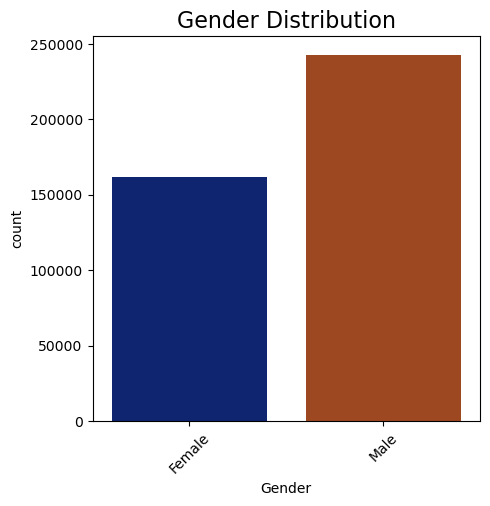

In [32]:
plt.figure(figsize=(5, 5))
sns.countplot(data=new_df, x="Gender", palette="dark")
plt.title("Gender Distribution", fontsize=16)
plt.xticks(rotation=45)
plt.show()

### 2.Education Level Distribution

Text(0.5, 1.0, 'Education Level Distribution')

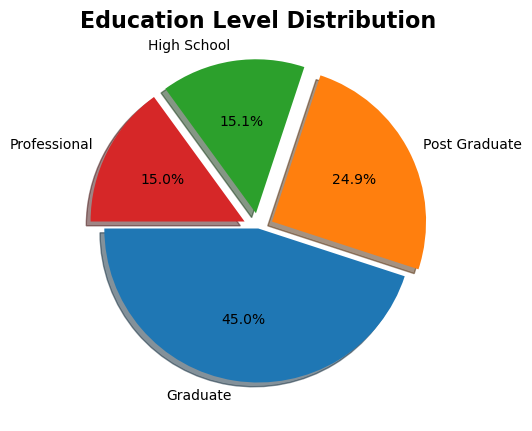

In [33]:
education = new_df['Education'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(education, labels=education.index, autopct="%1.1f%%", startangle=180, shadow=True, explode=[0,0.1,0.1,0.1])
plt.title("Education Level Distribution", fontsize=16, fontweight='bold')

### 3.Trend of Customer House Types

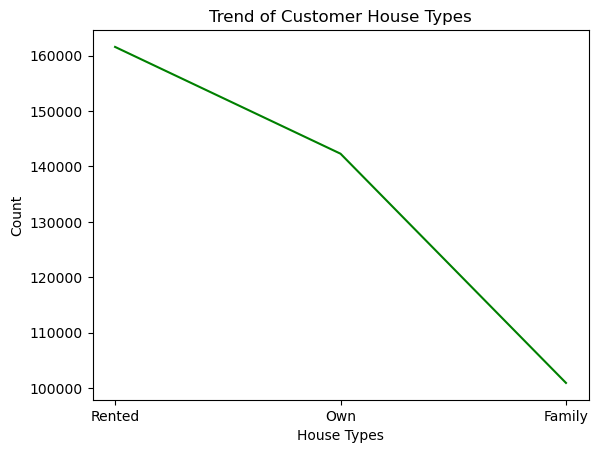

In [34]:
house_counts = new_df['House Type'].value_counts().reset_index()
house_counts.columns = ['House Type', 'Count']

sns.lineplot(data=house_counts, x='House Type', y='Count', color='Green')
plt.title('Trend of Customer House Types')
plt.xlabel('House Types')
plt.ylabel('Count')
plt.show()

### 4.Employment Status by House Type

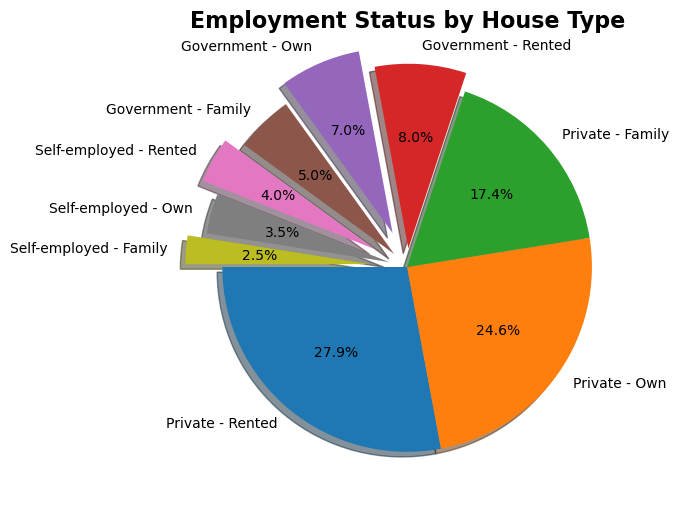

In [35]:
employe = new_df[['Employment Type', 'House Type']].value_counts()
employe = employe.reset_index(name='Count')

plt.figure(figsize=(6,6))
plt.pie(employe['Count'], labels=employe[['Employment Type','House Type']].astype(str).agg(' - '.join, axis=1),
        autopct="%1.1f%%", startangle=180, shadow=True, explode=[0, 0, 0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2])
plt.title("Employment Status by House Type", fontsize=16, fontweight='bold')
plt.show()

### 5.Marital Status by Gender

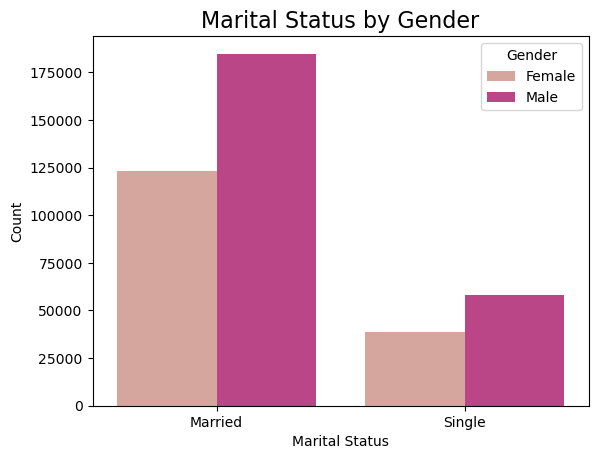

In [36]:
sns.countplot(data=new_df, x='Marital Status', hue='Gender', palette=["#DE9F94",  "#CD328A"])
plt.title("Marital Status by Gender", fontsize=16)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### 6.Analyzing EMI eligibility distribution patterns across different lending scenarios

emi_scenario,applications,approved,approval_rate
E-commerce Shopping EMI,78578,20701,26%
Education EMI,78569,13914,18%
Home Appliances EMI,78590,20428,26%
Personal Loan EMI,78635,8890,11%
Vehicle EMI,78548,8315,11%


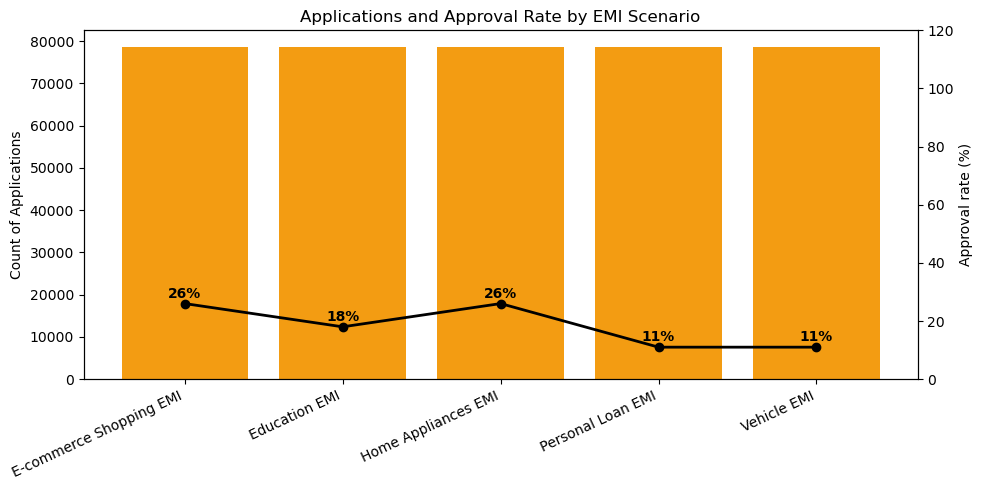

In [17]:
new_df.columns = new_df.columns.str.strip()
new_df['emi_scenario'] = new_df['emi_scenario'].str.strip()
new_df['emi_eligibility'] = new_df['emi_eligibility'].str.strip()

#Plotting the Pivot
pivot1 = new_df.groupby('emi_scenario')['emi_eligibility'].agg(
    applications='size',
    approved=lambda s: (s=='Eligible').sum()
)
pivot1['approval_rate'] = (pivot1['approved']/pivot1['applications']*100).round(0).astype(int).astype(str)+'%'

# Display as table
display(pivot1.reset_index().style.set_table_attributes('style="border:1px solid black;"').hide(axis='index'))

#Plotting the Graph
x = np.arange(len(pivot1))
rates = (pivot1['approved']/pivot1['applications']*100).round(0).astype(int)

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(x, pivot1['applications'], color='#f39c12')
ax1.set_xticks(x)
ax1.set_xticklabels(pivot1.index, rotation=25, ha='right')
ax1.set_ylabel('Count of Applications')
ax1.set_title('Applications and Approval Rate by EMI Scenario')

ax2 = ax1.twinx()
ax2.plot(x, rates, 'ko-', linewidth=2)
ax2.set_ylabel('Approval rate (%)')
ax2.set_yticks(np.arange(0, 121, 20))  # 0, 20, 40, 60, 80, 100, 120

for i, r in enumerate(rates):
    ax2.text(i, r+2, f'{r}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 7. Percentage distribution of emi_eligibility per emi_scenario

emi_scenario,Eligible,High_Risk,Not_Eligible
E-commerce Shopping EMI,26%,5%,69%
Education EMI,18%,5%,78%
Home Appliances EMI,26%,5%,69%
Personal Loan EMI,11%,3%,85%
Vehicle EMI,11%,3%,86%


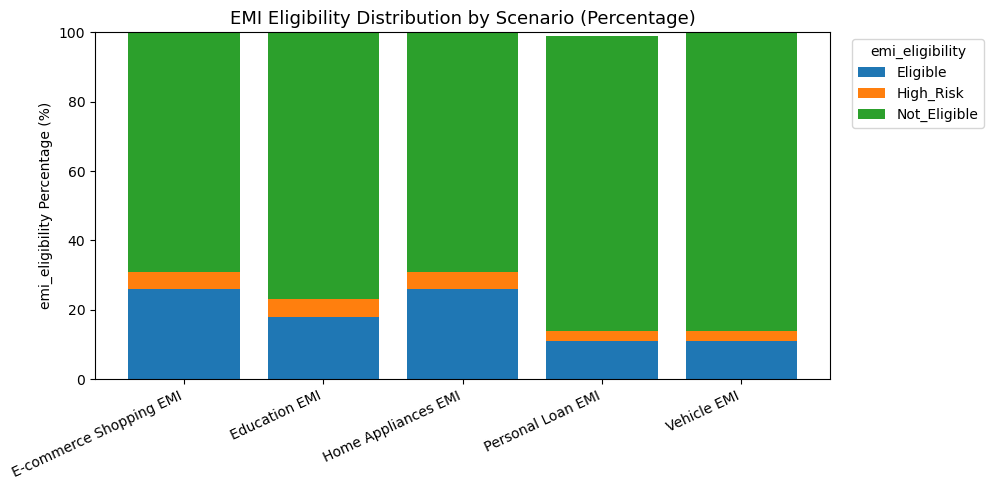

In [18]:
# Plotting the Pivot
cros = pd.crosstab(new_df['emi_scenario'], new_df['emi_eligibility'])
cros_pct = (cros.div(cros.sum(axis=1), axis=0) * 100).round(0).astype(int)
cros_pct_str = cros_pct.astype(str) + '%'

# Display as table
display(cros_pct_str.reset_index().style.set_table_attributes('style="border:1px solid black;"').hide(axis='index'))


# Plotting the graph
x = np.arange(len(cros_pct))
fig, ax = plt.subplots(figsize=(10,5))

bottom = np.zeros(len(cros_pct))
for col in cros_pct.columns:
    ax.bar(cros_pct.index, cros_pct[col], bottom=bottom, label=col)
    bottom += cros_pct[col]

ax.set_title("EMI Eligibility Distribution by Scenario (Percentage)", fontsize=13)
ax.set_ylabel("emi_eligibility Percentage (%)")
ax.set_ylim(0, 100)
ax.legend(title="emi_eligibility", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

### 8.Correlation between financial variables and loan approval rates

Financial Variables,Loan Approval Rates (%)
max_monthly_emi,56%
bank_balance,25%
emergency_fund,23%
other_monthly_expenses,22%
monthly_salary,21%
credit_score,13%
requested_tenure,1%
current_emi_amount,-14%
requested_amount,-30%


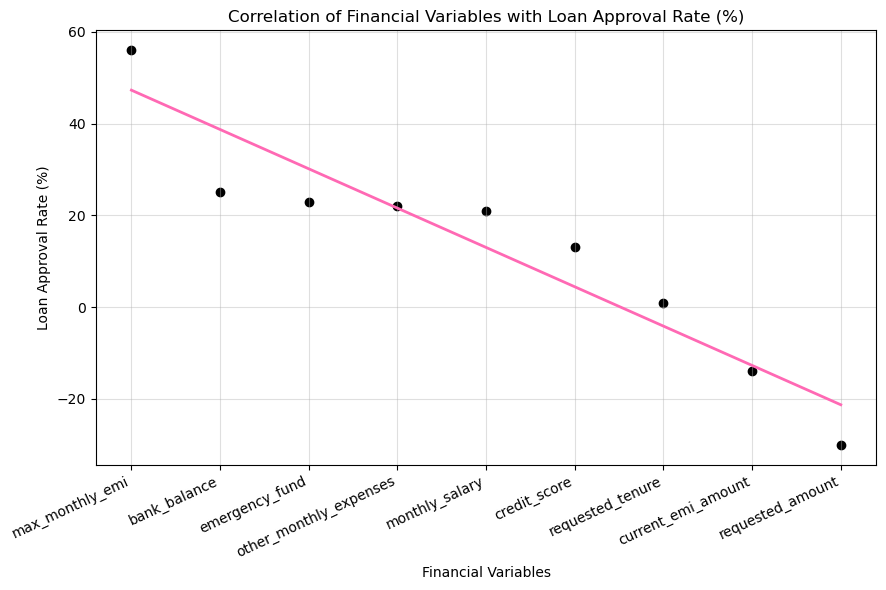

In [19]:
cols = ['monthly_salary','bank_balance','current_emi_amount','other_monthly_expenses',
        'requested_amount','max_monthly_emi','emergency_fund','credit_score','requested_tenure']
cols = [c for c in cols if c in new_df.columns]

for c in cols:
    new_df[c] = pd.to_numeric(new_df[c].astype(str).str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

new_df['approved'] = (new_df['emi_eligibility'].str.strip() == 'Eligible').astype(int)

corr = (new_df[cols + ['approved']].corr()['approved'].drop('approved')*100).round(0).astype(int)
corr = corr.sort_values(ascending=False).reset_index()
corr.columns = ['Financial Variables', 'Loan Approval Rates (%)']
corr['Loan Approval Rates (%)'] = corr['Loan Approval Rates (%)'].astype(str) + '%'

display(corr.style.hide(axis='index'))

# Plot correlation scatter plot
x = np.arange(len(corr))                   # Convert correlation values to numeric (remove %)
y = corr['Loan Approval Rates (%)'].str.replace('%', '').astype(float)

plt.figure(figsize=(9,6))
plt.scatter(x, y, color='black')  # Scatter points
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='hotpink', linewidth=2)  # Trend line

plt.title('Correlation of Financial Variables with Loan Approval Rate (%)', fontsize=12)
plt.xlabel('Financial Variables')
plt.ylabel('Loan Approval Rate (%)')
plt.xticks(x, corr['Financial Variables'], rotation=25, ha='right')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

### 9.Investigating demographic patterns

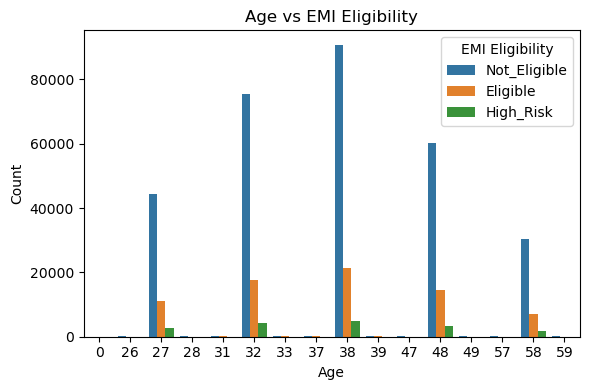

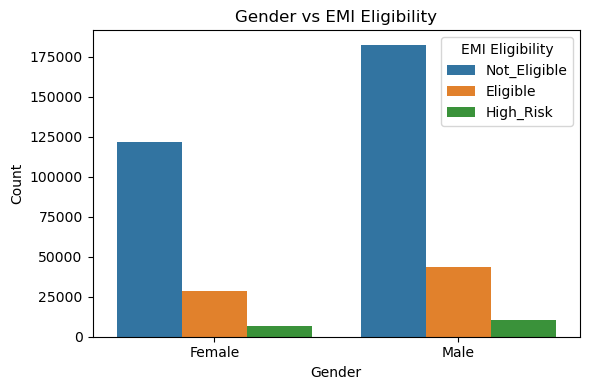

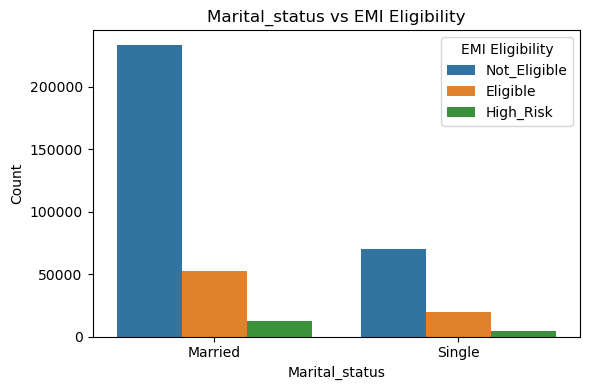

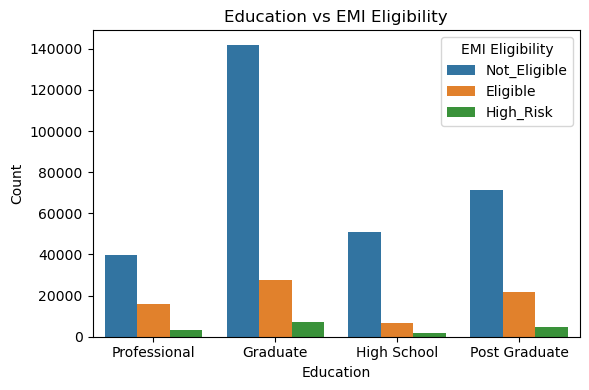

In [20]:
demo_cols = ['age', 'gender', 'marital_status', 'education']
target = 'emi_eligibility'
for col in demo_cols:
    if col in new_df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=new_df, x=col, hue=target)
        plt.title(f'{col.capitalize()} vs EMI Eligibility')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.legend(title='EMI Eligibility')
        plt.tight_layout()
        plt.show()

### 10.Investigating Risk factor relationships

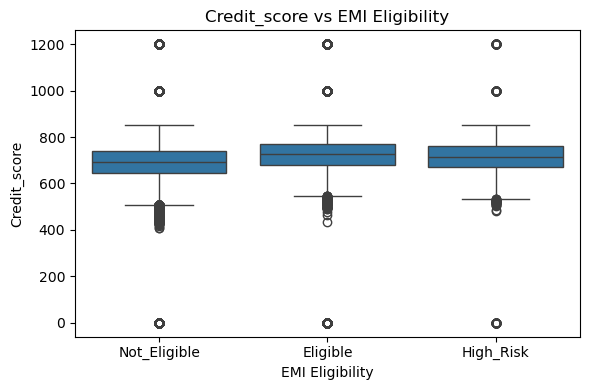

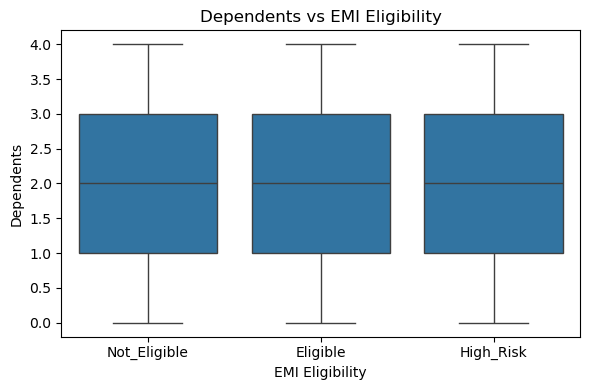

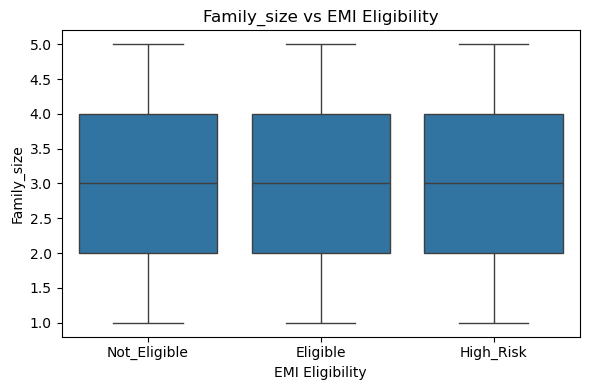

In [21]:
risk_cols = ['credit_score', 'dependents', 'family_size']
for col in risk_cols:
    if col in new_df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=new_df, x=target, y=col)
        plt.title(f'{col.capitalize()} vs EMI Eligibility')
        plt.xlabel('EMI Eligibility')
        plt.ylabel(col.capitalize())
        plt.tight_layout()
        plt.show()

### 11.EMI Eligibility Distribution

,count,proportion
emi_eligibility,,
Not_Eligible,303708,77.3%
Eligible,72248,18.4%
High_Risk,16964,4.3%


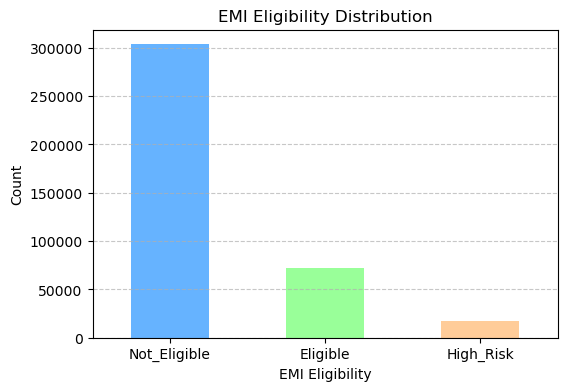

In [22]:
cnt = new_df['emi_eligibility'].value_counts()
pct = new_df['emi_eligibility'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

summary = pd.concat([cnt, pct], axis=1).rename(columns={0: 'Count', 1: 'Percentage'})
display(summary)

plt.figure(figsize=(6,4))
cnt.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('EMI Eligibility Distribution')
plt.xlabel('EMI Eligibility')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

### 12.Approval Rate by Key Demographic and Scenario Categories

,emi_scenario,total,approved,approval_rate%
0,E-commerce Shopping EMI,78578,20701,26.3%
1,Education EMI,78569,13914,17.7%
2,Home Appliances EMI,78590,20428,26.0%
3,Personal Loan EMI,78635,8890,11.3%
4,Vehicle EMI,78548,8315,10.6%


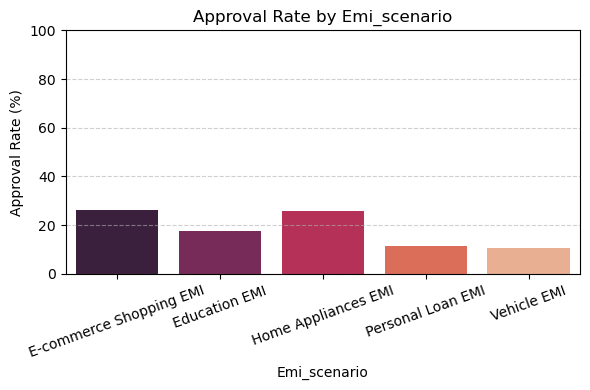

,gender,total,approved,approval_rate%
0,Female,157070,28879,18.4%
1,Male,235850,43369,18.4%


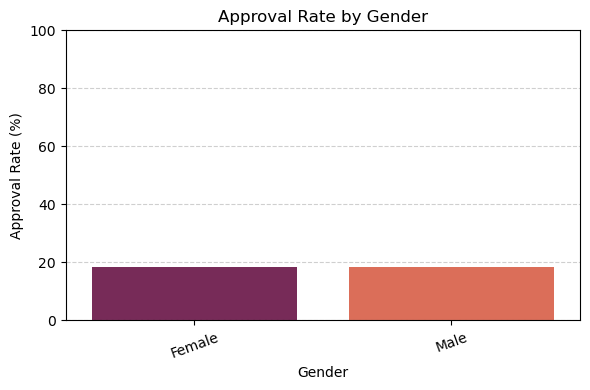

,education,total,approved,approval_rate%
0,Graduate,176722,27735,15.7%
1,High School,59287,6570,11.1%
2,Post Graduate,97982,21978,22.4%
3,Professional,58929,15965,27.1%


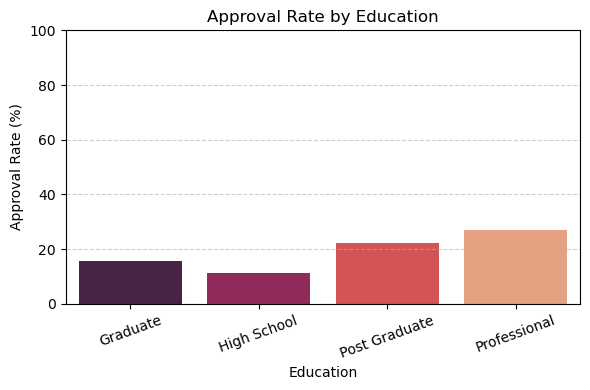

In [23]:
# Approval rate by key categories
for col in ['emi_scenario', 'gender', 'education']:
    if col in new_df.columns:
        g = new_df.groupby(col)['emi_eligibility'].agg(
            total='size',
            approved=lambda s: (s == 'Eligible').sum()
        )
        g['approval_rate%'] = (g['approved'] / g['total'] * 100).round(1)
        g_display = g.copy()
        g_display['approval_rate%'] = g_display['approval_rate%'].astype(str) + '%'

        display(g_display.reset_index())

        # ---- Visualization ----
        plt.figure(figsize=(6, 4))
        sns.barplot(
            data=g.reset_index(),
            x=col,
            y='approval_rate%',
            palette='rocket'
        )
        plt.title(f'Approval Rate by {col.capitalize()}')
        plt.ylabel('Approval Rate (%)')
        plt.xlabel(col.capitalize())
        plt.xticks(rotation=20)
        plt.ylim(0, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

### 13.Approval Rate by Salary Bins

salary_bin
Q1     5.1%
Q2     9.4%
Q3    15.3%
Q4    23.5%
Q5    38.7%
Name: emi_eligibility, dtype: object

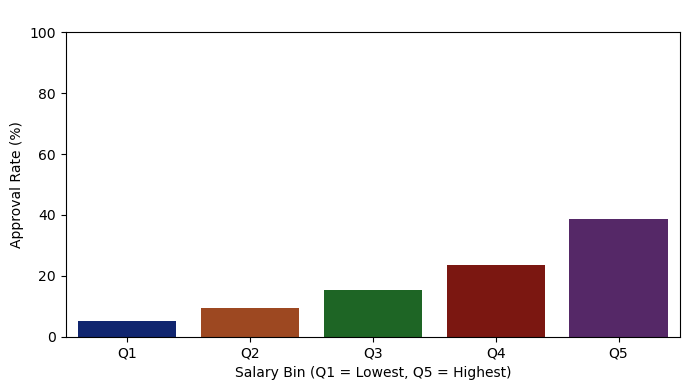

In [24]:
# --- Approval rate by salary bins ---
if 'monthly_salary' in new_df.columns:
    # Clean and bin salary
    s = pd.to_numeric(new_df['monthly_salary'].astype(str).str.replace(r'[^0-9.]', '', regex=True),
                      errors='coerce')
    new_df['salary_bin'] = pd.qcut(s.fillna(0) + 1, 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

    # Calculate approval %
    approval_rate = new_df.groupby('salary_bin')['emi_eligibility'].apply(
        lambda s: (s == 'Eligible').mean()
    ).mul(100).round(1)

    # Display as table
    display(approval_rate.astype(str) + '%')

    # --- Visualization ---
    plt.figure(figsize=(7, 4))
    ax = sns.barplot(
        x=approval_rate.index,
        y=approval_rate.values,
        palette="dark"
    )

    # Add annotations on bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', color='white',
                    fontsize=10, fontweight='bold')

    plt.title('Approval Rate by Salary Bins (Business Insight)', fontsize=13, color='white')
    plt.xlabel('Salary Bin (Q1 = Lowest, Q5 = Highest)')
    plt.ylabel('Approval Rate (%)')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

### 14.Correlation Matrix between numeric features

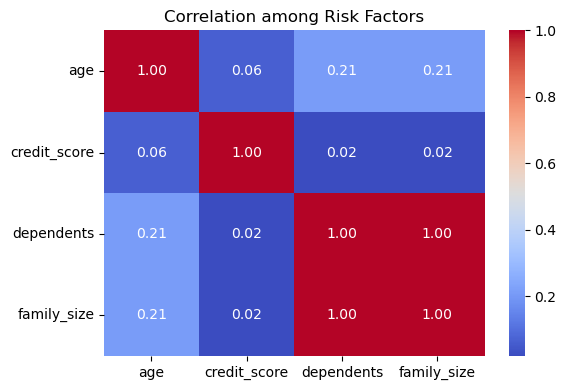

In [25]:
num_cols = ['age','credit_score','dependents','family_size']
num_cols = [c for c in num_cols if c in new_df.columns]
plt.figure(figsize=(6,4))
sns.heatmap(new_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation among Risk Factors')
plt.tight_layout()
plt.show()

## 3. Feature Engineering

###  Removing Outerliers in dataset

In [37]:
Q1 = new_df['Max Monthly Emi'].quantile(0.25)
Q3 = new_df['Max Monthly Emi'].quantile(0.75)
IQR = Q3 - Q1

df_clean = new_df[~((new_df['Max Monthly Emi'] < (Q1 - 1.5*IQR)) | (new_df['Max Monthly Emi'] > (Q3 + 1.5*IQR)))]
print(df_clean.shape)

(387532, 27)


### Changing the categorical columns in to Label encoder

In [38]:
categorical_cols = ['Gender', 'Marital Status', 'Education', 
                    'Employment Type', 'Company Type', 'House Type', 
                    'Emi Scenario','Existing Loans', 'Emi Eligibility']

numeric_cols = ['Age', 'Monthly Salary', 'Years Of Employment', 'Monthly Rent', 
                'Family Size', 'Dependents', 'School Fees', 'College Fees', 
                'Travel Expenses', 'Groceries Utilities', 'Other Monthly Expenses', 
                'Existing Loans', 'Current Emi Amount', 'Credit Score', 'Bank Balance', 
                'Emergency Fund', 'Requested Amount', 'Requested Tenure', 'Max Monthly Emi']

In [39]:
X_encoded = pd.get_dummies(df_clean[numeric_cols + categorical_cols],columns=categorical_cols, drop_first=True)

In [42]:
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [43]:
X_encoded.columns

Index(['Age', 'Monthly Salary', 'Years Of Employment', 'Monthly Rent',
       'Family Size', 'Dependents', 'School Fees', 'College Fees',
       'Travel Expenses', 'Groceries Utilities', 'Other Monthly Expenses',
       'Current Emi Amount', 'Credit Score', 'Bank Balance', 'Emergency Fund',
       'Requested Amount', 'Requested Tenure', 'Max Monthly Emi',
       'Gender_Male', 'Marital Status_Single', 'Education_High School',
       'Education_Post Graduate', 'Education_Professional',
       'Employment Type_Private', 'Employment Type_Self-employed',
       'Company Type_MNC', 'Company Type_Mid-size', 'Company Type_Small',
       'Company Type_Startup', 'House Type_Own', 'House Type_Rented',
       'Emi Scenario_Education EMI', 'Emi Scenario_Home Appliances EMI',
       'Emi Scenario_Personal Loan EMI', 'Emi Scenario_Vehicle EMI',
       'Existing Loans_Yes', 'Existing Loans_Yes', 'Emi Eligibility_High_Risk',
       'Emi Eligibility_Not_Eligible'],
      dtype='object')

## 4. Machine Learning Model Development

### Classification Models (EMI Eligibility Prediction)

In [45]:
X_cls = X_encoded.drop(['Emi Eligibility_High_Risk', 'Emi Eligibility_Not_Eligible'], axis=1)
y_cls = df_clean['Emi Eligibility']

### Training and Spiltting the Data

In [46]:
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# --- Scale features (same scaler used on entire data) ---
scaler_cls = StandardScaler()
X_cls_train = scaler_cls.fit_transform(X_cls_train)
X_cls_test = scaler_cls.transform(X_cls_test)

### 1.Logistic Regression

In [47]:
# --- logistic regression (memory-friendly solver) ---
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(X_cls_train, y_cls_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [51]:
# --- evaluate ---
y_cls_pred = model.predict(X_cls_test)
y_cls_prob = model.predict_proba(X_cls_test)[:, 1]   # probabilities for ROC–AUC

print("Accuracy:", round(accuracy_score(y_cls_test, y_cls_pred), 4))
print("ROC–AUC (OvR):", round(roc_auc_score(y_cls_test, model.predict_proba(X_cls_test), multi_class='ovr'), 4))
print("\nClassification report:\n", classification_report(y_cls_test, y_cls_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_cls_test, y_cls_pred))

Accuracy: 0.9252
ROC–AUC (OvR): 0.9676

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85     18247
           1       0.31      0.05      0.09      4846
           2       0.95      0.98      0.96     93167

    accuracy                           0.93    116260
   macro avg       0.70      0.64      0.64    116260
weighted avg       0.90      0.93      0.91    116260


Confusion matrix:
 [[15992   456  1799]
 [ 1465   254  3127]
 [ 1736   111 91320]]


### 2.Random Forest Classifier

In [52]:
# ---Random Forest Classifier ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_cls_train, y_cls_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
# --- Test & Evaluate ---
y_cls_pred = rf.predict(X_cls_test)
y_cls_prob = rf.predict_proba(X_cls_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_cls_test, y_cls_pred), 4))
print("ROC–AUC (OvR):", round(roc_auc_score(y_cls_test, model.predict_proba(X_cls_test), multi_class='ovr'), 4))
print("\nClassification Report:\n", classification_report(y_cls_test, y_cls_pred))

# --- Feature Importance --- (As Random Forest is a tree based model)
importances = pd.Series(rf.feature_importances_, index=X_cls.columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

Accuracy: 0.9536
ROC–AUC (OvR): 0.9676

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     18247
           1       0.85      0.06      0.11      4846
           2       0.96      1.00      0.98     93167

    accuracy                           0.95    116260
   macro avg       0.91      0.67      0.68    116260
weighted avg       0.95      0.95      0.94    116260


Top 10 Important Features:
 Requested Amount          0.275057
Max Monthly Emi           0.228141
Requested Tenure          0.114565
Monthly Salary            0.043727
Groceries Utilities       0.027809
Bank Balance              0.023901
Emergency Fund            0.022410
Travel Expenses           0.022188
Credit Score              0.021685
Other Monthly Expenses    0.021115
dtype: float64


### 3.XGB Classifier

In [95]:
# ---XGBoost Classifier ---
xgb = XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    eval_metric='logloss'   # keep this for binary classification
)
xgb.fit(X_cls_train, y_cls_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [96]:
# --- Test & Evaluate ---
y_cls_pred = xgb.predict(X_cls_test)
y_cls_prob = xgb.predict_proba(X_cls_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_cls_test, y_cls_pred), 4))
print("ROC–AUC (OvR):", round(roc_auc_score(y_cls_test, model.predict_proba(X_cls_test), multi_class='ovr'), 4))
print("\nClassification Report:\n", classification_report(y_cls_test, y_cls_pred))

# --- Feature Importance --- (As XGBoost is a tree based model)
importances = pd.Series(xgb.feature_importances_, index=X_cls.columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

Accuracy: 0.9724
ROC–AUC (OvR): 0.9676

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     18247
           1       0.94      0.37      0.53      4846
           2       0.98      1.00      0.99     93167

    accuracy                           0.97    116260
   macro avg       0.95      0.79      0.83    116260
weighted avg       0.97      0.97      0.97    116260


Top 10 Important Features:
 Max Monthly Emi                     0.382125
Requested Amount                    0.278682
Requested Tenure                    0.185935
Emi Scenario_Vehicle EMI            0.073390
Emi Scenario_Personal Loan EMI      0.040791
Emi Scenario_Home Appliances EMI    0.003738
Age                                 0.003171
Years Of Employment                 0.002728
Groceries Utilities                 0.002458
Emergency Fund                      0.002431
dtype: float32


In [97]:
# Best Performing Model for Deployment

models = {
    "Logistic Regression": model,
    "Random Forest Classifier": rf,
    "XGBoost Classifier": xgb
}

scores = {}
for name, m in models.items():
    y_pred = m.predict(X_cls_test)
    y_prob = m.predict_proba(X_cls_test)

    scores[name] = {
        "Acc": accuracy_score(y_cls_test, y_pred),
        "AUC": roc_auc_score(y_cls_test, y_prob, multi_class='ovr')
    }

df = pd.DataFrame(scores).T.sort_values("AUC", ascending=False)
best = df.index[0]
print("\nModel Comparison:\n", df)
print(f"\n Best Model: {best}")


Model Comparison:
                                Acc       AUC
XGBoost Classifier        0.972398  0.996288
Random Forest Classifier  0.953613  0.987169
Logistic Regression       0.925219  0.967586

 Best Model: XGBoost Classifier


In [106]:
with open("EMI Classifier Model.pkl", "wb") as file:
    pickle.dump(xgb, file)

print("✅ Model saved ")

✅ Model saved 


### Regression Models (Maximum EMI Amount Prediction)

In [77]:
X_reg = X_encoded.drop(['Max Monthly Emi', 'Dependents', 'School Fees', 
                        'College Fees', 'Travel Expenses', 'Groceries Utilities'], axis=1)

y_reg = df_clean['Max Monthly Emi']

### Training and Spiltting the Data

In [78]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- scale and fit ---
scaler = StandardScaler()
X_reg_train = scaler.fit_transform(X_reg_train)
X_reg_test  = scaler.transform(X_reg_test)

### 1.Linear Regression

In [79]:
# --- Train Linear Regression ---
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
# --- Evaluate Linear Regression model ---
y_reg_pred = lr.predict(X_reg_test)
print("RMSE:", round(sqrt(mean_squared_error(y_reg_test, y_reg_pred)), 4))
print("MAE:", round(mean_absolute_error(y_reg_test, y_reg_pred), 4))
print("R² Score:", round(r2_score(y_reg_test, y_reg_pred), 4))

RMSE: 3604.0119
MAE: 2778.245
R² Score: 0.5969


### 2.Random Forest Regressor

In [81]:
rf_reg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,     # 20–50 for testing, 100+ for final run
    max_depth=15,        # Limit tree depth
    max_features='sqrt', # Use subset of features per split
    min_samples_split=10,
    n_jobs=-1
)
rf_reg.fit(X_reg_train,y_reg_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
y_reg_pred = rf_reg.predict(X_reg_test)

print("RMSE:", round(np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)), 4))
print("MAE:", round(mean_absolute_error(y_reg_test, y_reg_pred), 4))
print("R² Score:", round(r2_score(y_reg_test, y_reg_pred), 4))

# --- Feature importance (top 10) ---
importances = pd.Series(rf_reg.feature_importances_, index=X_reg.columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

RMSE: 2880.0578
MAE: 2139.4462
R² Score: 0.7426

Top 10 Important Features:
 Emi Eligibility_Not_Eligible    0.233646
Monthly Salary                  0.182483
Current Emi Amount              0.070826
House Type_Rented               0.065470
Monthly Rent                    0.060134
Bank Balance                    0.057998
Existing Loans_Yes              0.055275
Existing Loans_Yes              0.052699
Other Monthly Expenses          0.043482
Requested Amount                0.038297
dtype: float64


### 3.XGBoost Regressor

In [83]:
# --- Train XGBoost Regressor ---
xgb_reg = XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='reg:squarederror'
)
xgb_reg.fit(X_reg_train, y_reg_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [84]:
# ---- Evaluate XGBoost Regressor model ----
y_reg_pred = xgb_reg.predict(X_reg_test)

print("RMSE:", round(np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)), 4))
print("MAE:", round(mean_absolute_error(y_reg_test, y_reg_pred), 4))
print("R² Score:", round(r2_score(y_reg_test, y_reg_pred), 4))

# --- Feature importance (top 10) ---
importances = pd.Series(xgb_reg.feature_importances_, index=X_reg.columns)
print("\nTop 10 Important Features:\n", importances.sort_values(ascending=False).head(10))

RMSE: 2629.0593
MAE: 1919.8601
R² Score: 0.7855

Top 10 Important Features:
 Emi Eligibility_Not_Eligible    0.404490
Existing Loans_Yes              0.161415
Existing Loans_Yes              0.116628
House Type_Rented               0.096915
Monthly Salary                  0.041797
House Type_Own                  0.025170
Family Size                     0.024049
Requested Amount                0.018289
Bank Balance                    0.016984
Emi Eligibility_High_Risk       0.013948
dtype: float32


In [85]:
# --- Compare regression models ---
models = {"Linear": lr, "RandomForest": rf_reg, "XGBoost": xgb_reg}
scores = {}
for name, m in models.items():
    y_reg_pred = m.predict(X_reg_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
    r2  = r2_score(y_reg_test, y_reg_pred)
    scores[name] = {"RMSE": rmse, "R2": r2}

# --- Summary table & selection (choose by lowest RMSE) ---
df = pd.DataFrame(scores).T
best_name = df.sort_values("RMSE").index[0]
best_model = models[best_name]
reason = f"lowest RMSE ({df.loc[best_name,'RMSE']:.2f}) and R²={df.loc[best_name,'R2']:.3f}"

print("\nRegression Model Comparison:\n", df)
print(f"\nBest Model: {best_name} — selected due to {reason}")


Regression Model Comparison:
                      RMSE        R2
Linear        3604.011928  0.596899
RandomForest  2880.057774  0.742579
XGBoost       2629.059289  0.785493

Best Model: XGBoost — selected due to lowest RMSE (2629.06) and R²=0.785


In [107]:
with open("EMI Regression Model.pkl", "wb") as file:
    pickle.dump(xgb_reg, file)

print("✅ Model saved")

✅ Model saved


## 5. Model Selection and MLflow Integration

### Configure MLflow tracking server for organized experiment management

In [89]:
# Configure MLflow tracking URI (local or remote server)
mlflow.set_tracking_uri("file:///C:/Users/pavan/Labmentix/10.EMI Prediction Project/mlruns")

# Set experiment name
mlflow.set_experiment("EMI_Prediction_Models")

print("MLflow Tracking Configured!")

MLflow Tracking Configured!


### Log comprehensive model parameters, hyperparameters, and performance metrics for all models

In [98]:
def safe_log_params(model):
    try:
        for k, v in model.get_params().items():
            try:
                mlflow.log_param(k, json.dumps(v, default=str) if isinstance(v, (list, tuple, dict, np.ndarray)) else v)
            except Exception:
                mlflow.log_param(k, repr(v)[:250])
    except Exception:
        pass


def _to_df(X):
    if isinstance(X, pd.DataFrame):
        return X
    return pd.DataFrame(X, columns=[f"f{i}" for i in range(np.asarray(X).shape[1])])


def log_run(name, model, X_val, y_val, problem="classification"):
    Xv = _to_df(X_val)
    tmp_dir = tempfile.gettempdir()  # ✅ OS-safe temp folder

    with mlflow.start_run(run_name=name):
        safe_log_params(model)

        # ---- Classification logging ----
        if problem == "classification":
            y_cls_pred = model.predict(Xv)
            mlflow.log_metric("accuracy", float(accuracy_score(y_val, y_cls_pred)))

            try:
                proba = model.predict_proba(Xv)[:, 1]
                mlflow.log_metric("roc_auc", float(roc_auc_score(y_val, proba)))
            except Exception:
                pass

            rpt = classification_report(y_val, y_cls_pred, output_dict=True, zero_division=0)
            for avg in ("macro avg", "weighted avg"):
                if avg in rpt:
                    mlflow.log_metric(f"{avg.replace(' ','_')}_precision", float(rpt[avg]["precision"]))
                    mlflow.log_metric(f"{avg.replace(' ','_')}_recall",    float(rpt[avg]["recall"]))
                    mlflow.log_metric(f"{avg.replace(' ','_')}_f1",        float(rpt[avg]["f1-score"]))

            # Confusion matrix
            cm = pd.DataFrame(confusion_matrix(y_val, y_cls_pred))
            p = os.path.join(tmp_dir, f"{name.replace(' ','_')}_confusion_matrix.csv")
            cm.to_csv(p, index=False, header=False)
            mlflow.log_artifact(p, artifact_path="metrics")

        # ---- Regression logging ----
        else:
            y_reg_pred = model.predict(Xv)
            rmse = float(np.sqrt(mean_squared_error(y_val, y_reg_pred)))
            mae  = float(mean_absolute_error(y_val, y_reg_pred))
            r2   = float(r2_score(y_val, y_reg_pred))
            mape = float(np.mean(np.abs((y_val - y_reg_pred) / np.maximum(np.abs(y_val), 1))) * 100)

            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("MAE", mae)
            mlflow.log_metric("R2", r2)
            mlflow.log_metric("MAPE_pct", mape)

        # ---- Feature importance logging ----
        try:
            if hasattr(model, "feature_importances_"):
                fi = pd.DataFrame({"feature": Xv.columns, "importance": model.feature_importances_}) \
                       .sort_values("importance", ascending=False)
            elif hasattr(model, "coef_"):
                fi = pd.DataFrame({"feature": Xv.columns, "importance": np.ravel(model.coef_)})
            else:
                fi = None
            if fi is not None:
                fp = os.path.join(tmp_dir, f"{name.replace(' ','_')}_feature_importances.csv")
                fi.to_csv(fp, index=False)
                mlflow.log_artifact(fp, artifact_path="feature_importances")
        except Exception:
            pass

        # ---- Log model with signature ----
        try:
            X_ex = Xv.iloc[:2]
            y_ex = model.predict(X_ex)
            sig = infer_signature(X_ex, y_ex)
            mlflow.sklearn.log_model(model, name="model", signature=sig, input_example=X_ex)
        except Exception:
            pkl = os.path.join(tmp_dir, f"{name.replace(' ','_')}_model.pkl")
            joblib.dump(model, pkl)
            mlflow.log_artifact(pkl, artifact_path="model_pickle")


# --- REGISTER MODELS ---
models = {
    "Logistic Regression": ("classification", model),
    "Random Forest Classifier": ("classification", rf),
    "XGBoost Classifier": ("classification", xgb),
    "Linear Regression": ("regression", lr),
    "Random Forest Regressor": ("regression", rf_reg),
    "XGBoost Regressor": ("regression", xgb_reg),
}

# --- LOGGING EXECUTION WITH CORRECT TEST SETS ---
for name, (ptype, mdl) in models.items():
    print(f"Logging: {name}")
    try:
        if ptype == "classification":
            log_run(name, mdl, X_cls_test, y_cls_test, ptype)
        else:
            log_run(name, mdl, X_reg_test, y_reg_test, ptype)
        print(f"✓ Done: {name}")
    except Exception as e:
        print(f"✗ Failed: {name} → {e}")

Logging: Logistic Regression


✓ Done: Logistic Regression
Logging: Random Forest Classifier


✓ Done: Random Forest Classifier
Logging: XGBoost Classifier


✓ Done: XGBoost Classifier
Logging: Linear Regression


✓ Done: Linear Regression
Logging: Random Forest Regressor


✓ Done: Random Forest Regressor
Logging: XGBoost Regressor


✓ Done: XGBoost Regressor


### Create systematic artifact storage for models, visualizations, and datasets

In [100]:
runs = mlflow.search_runs(experiment_names=["EMI_Prediction_Models"])
display(runs[['run_id','status','start_time','artifact_uri']])

# Deleted Failed mlflow

# --- filter failed runs ---
failed_runs = runs[runs['status'] == 'FAILED']

if failed_runs.empty:
    print("✅ No failed runs found.")
else:
    print(f"🗑 Found {len(failed_runs)} failed runs. Deleting...\n")

    for rid in failed_runs['run_id']:
        mlflow.delete_run(rid)
        print(f"✅ Deleted run_id: {rid}")

    print("\n✨ All failed runs marked as deleted in MLflow.")
    print("They will no longer appear in the UI (soft delete).")
    print("To permanently remove them from disk, run this command in your terminal:\n")
    print('mlflow gc --backend-store-uri "file:///C:/Users/pavan/Labmentix/10.EMI Prediction Project/mlruns"')


,run_id,status,start_time,artifact_uri
0,00a4e63d76034e3288ace3f144cdd204,FINISHED,2025-11-02 07:03:55.570000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
1,fe80418e323141ea98b6b5967958da11,FINISHED,2025-11-02 07:03:46.871000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
2,e9a85fd6b7824a4daef724b2c71aad1a,FINISHED,2025-11-02 07:03:39.485000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
3,65880f673ff6401987192a1af5050980,FINISHED,2025-11-02 07:03:29.901000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
4,d7518c654dc241b89fe72d392244a323,FINISHED,2025-11-02 07:03:10.948000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
5,9551a4f582be4a9fb5ef2078035b394e,FINISHED,2025-11-02 07:03:02.841000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
6,b32c69a3fbff4f379310d2a5297cc2ed,FINISHED,2025-11-02 07:02:16.270000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
7,15b61942c373487eb0749ee66b8793a9,FINISHED,2025-11-02 07:02:07.256000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
8,62bae945d802438bb593a06855cfda90,FINISHED,2025-11-02 07:01:59.612000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...
9,91ff1d0c247f41d988007e4ee2fd0cc1,FINISHED,2025-11-02 07:01:40.687000+00:00,file:///C:/Users/pavan/Labmentix/10.EMI Predic...


✅ No failed runs found.


### Store Artifacts (Models, Visualizations, and Datasets)

✅ Feature importance for Random Forest Classifier stored in MLflow.
✅ Feature importance for XGBoost Classifier stored in MLflow.
✅ Feature importance for Random Forest Regressor stored in MLflow.
✅ Feature importance for XGBoost Regressor stored in MLflow.


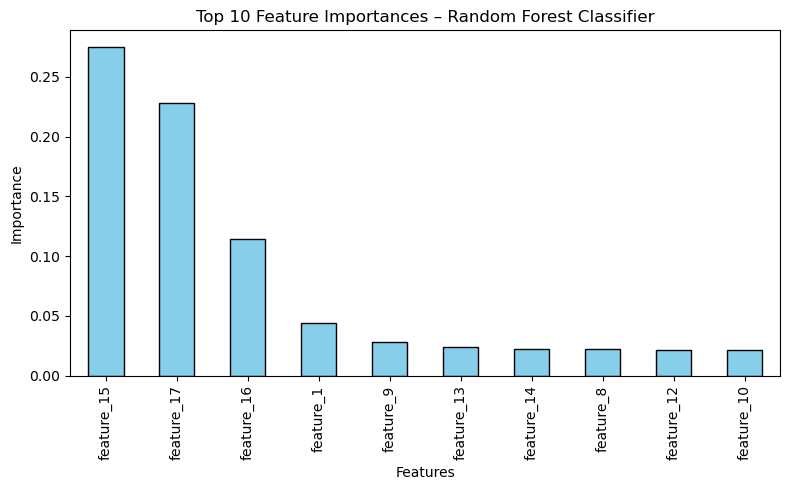

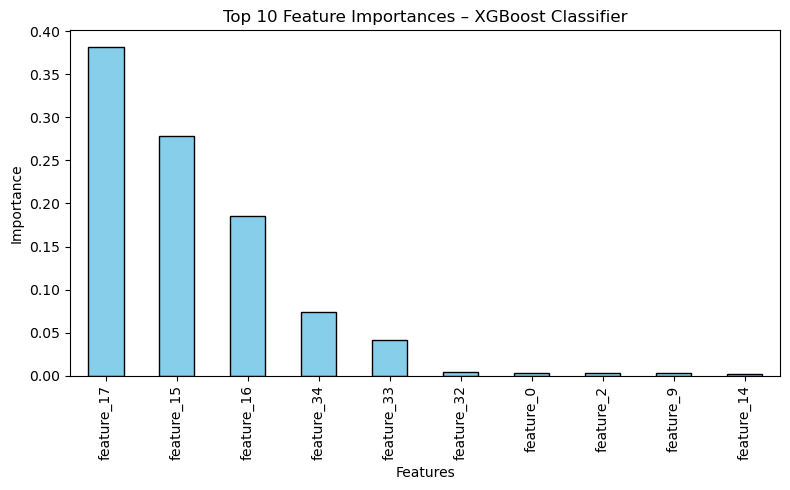

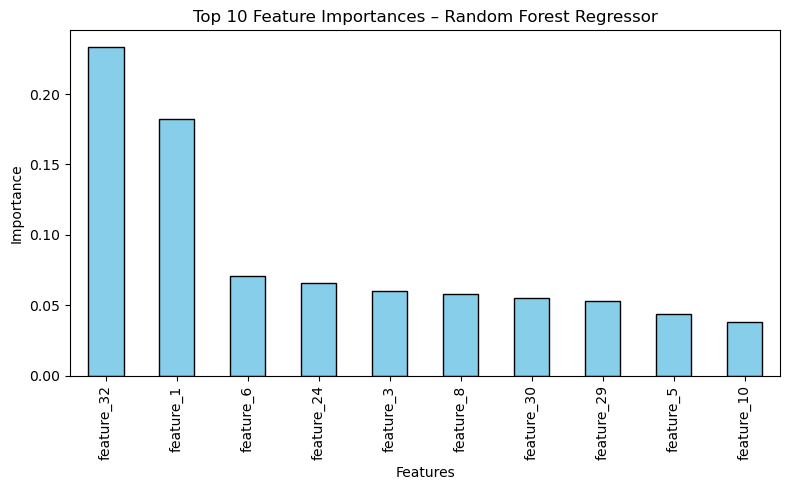

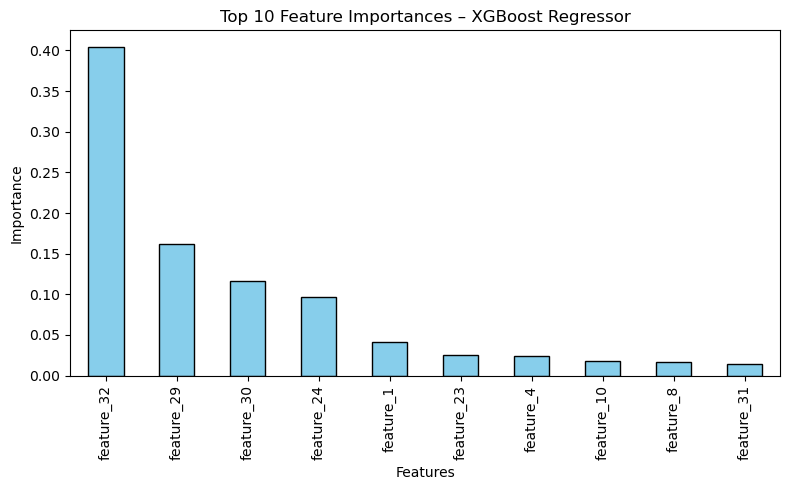

In [102]:
# Create Series safely (handles both DataFrame and ndarray)
def log_feature_importances(model, X_train, name, dataset_path=None):
    """Logs top 10 feature importances to MLflow for any model."""
    feature_names = (
        X_train.columns if hasattr(X_train, "columns") 
        else [f"feature_{i}" for i in range(X_train.shape[1])]
    )
    
    # Get importances safely
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=feature_names)
    elif hasattr(model, "coef_"):
        importances = pd.Series(np.ravel(model.coef_), index=feature_names)
    else:
        print(f"⚠️ {name}: Model has no feature importance attribute.")
        return
    
    # Plot
    plt.figure(figsize=(8, 5))
    importances.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Feature Importances – {name}")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()

    # Save & log
    fig_path = f"feature_importance_{name.replace(' ', '_')}.png"
    plt.savefig(fig_path)
    mlflow.log_artifact(fig_path)

    if dataset_path and os.path.exists(dataset_path):
        mlflow.log_artifact(dataset_path)
    
    print(f"✅ Feature importance for {name} stored in MLflow.")


# --- Run for both Classification & Regression Models ---
dataset_path = "/Users/pavan/Labmentix/10.EMI Prediction Project/emi_prediction_dataset.csv"

# Classification (Random Forest, XGBoost)
log_feature_importances(rf, X_cls_train, "Random Forest Classifier", dataset_path)
log_feature_importances(xgb, X_cls_train, "XGBoost Classifier", dataset_path)

# Regression (Random Forest, XGBoost)
log_feature_importances(rf_reg, X_reg_train, "Random Forest Regressor", dataset_path)
log_feature_importances(xgb_reg, X_reg_train, "XGBoost Regressor", dataset_path)


### Select best performing models based on evaluation metrics for production deployment

In [103]:
# Example classifier comparison results
class_results = {
    "Logistic Regression": {"Acc": 0.9252, "AUC": 0.9675},
    "Random Forest Classifier": {"Acc": 0.9536, "AUC": 0.9871},
    "XGBoost Classifier": {"Acc": 0.9723, "AUC": 0.9962}
}

# Example regressor comparison results
reg_results = {
    "Linear Regression": {"RMSE": 3604.01, "R2": 0.5968},
    "Random Forest Regressor": {"RMSE": 2880.05, "R2": 0.7425},
    "XGBoost Regressor": {"RMSE": 2629.05, "R2": 0.7854}
}

# Convert to DataFrames
class_df = pd.DataFrame(class_results).T
reg_df = pd.DataFrame(reg_results).T

# Identify best models
best_class = class_df["AUC"].idxmax()
best_reg = reg_df["R2"].idxmax()

print("Best Classifier:", best_class)
print("Best Regressor:", best_reg)

Best Classifier: XGBoost Classifier
Best Regressor: XGBoost Regressor


In [104]:
# End any previous active run
if mlflow.active_run() is not None:
    mlflow.end_run()

# Log best model metrics
with mlflow.start_run(run_name="Model_Comparison"):
    mlflow.log_metric("Best_Classifier_Acc", float(class_df.loc[best_class, "Acc"]))
    mlflow.log_metric("Best_Classifier_AUC", float(class_df.loc[best_class, "AUC"]))
    mlflow.log_metric("Best_Regressor_RMSE", float(reg_df.loc[best_reg, "RMSE"]))
    mlflow.log_metric("Best_Regressor_R2", float(reg_df.loc[best_reg, "R2"]))

    mlflow.log_param("Best_Classifier", best_class)
    mlflow.log_param("Best_Regressor", best_reg)
    
    print("✅ Best Models Logged for Deployment")

✅ Best Models Logged for Deployment


### Model Registry (Version Control and Production Tracking)

In [105]:
client = MlflowClient()
# find the run id (replace EXPERIMENT_NAME if different)
exp = client.get_experiment_by_name("EMI_Prediction_Models")
runs = client.search_runs(exp.experiment_id, order_by=["metrics.accuracy DESC"], max_results=50)

# choose the run that contains the model artifact (inspect the list if needed)
print("Found runs:", [(r.info.run_id, r.data.metrics) for r in runs[:5]])

# pick the best run (example: first run from search)
if len(runs) == 0:
    raise RuntimeError("No runs found in experiment.")
best_run_id = runs[0].info.run_id
print("Using run_id =", best_run_id)

# register the model (artifact_path 'model' assumed)
model_uri = f"runs:/{best_run_id}/model"
result = mlflow.register_model(model_uri=model_uri, name="EMI_Eligibility_XGBoost_Model")
print("Registered model version:", result.version)

Found runs: [('1a6c20b210a84e20b87788ee7ba95ca2', {'accuracy': 0.9884327598493332, 'macro_avg_f1': 0.931000882994008, 'macro_avg_precision': 0.9337058721134297, 'macro_avg_recall': 0.92833302344276, 'roc_auc': 0.9975571077103567, 'weighted_avg_f1': 0.9883967122245546, 'weighted_avg_precision': 0.9883641033132832, 'weighted_avg_recall': 0.9884327598493332}), ('ff20f46b33714f1cb06ebe2dc4861b9e', {'accuracy': 0.9801613560012217, 'macro_avg_f1': 0.8595921435820855, 'macro_avg_precision': 0.9488062520827, 'macro_avg_recall': 0.8018526095925296, 'roc_auc': 0.9952599663206295, 'weighted_avg_f1': 0.9782225396193702, 'weighted_avg_precision': 0.9791689020416424, 'weighted_avg_recall': 0.9801613560012217}), ('65880f673ff6401987192a1af5050980', {'accuracy': 0.9723980732840186, 'macro_avg_f1': 0.827078367889485, 'macro_avg_precision': 0.9530909582355012, 'macro_avg_recall': 0.7863835713907917, 'weighted_avg_f1': 0.9666025951035025, 'weighted_avg_precision': 0.9718142042216643, 'weighted_avg_recall

Registered model 'EMI_Eligibility_XGBoost_Model' already exists. Creating a new version of this model...
2025/11/02 12:45:28 WARNING mlflow.tracking._model_registry.fluent: Run with id 1a6c20b210a84e20b87788ee7ba95ca2 has no artifacts at artifact path 'model', registering model based on models:/m-4a1198d509ca4735ba339d3f5d9b3a7b instead
Created version '2' of model 'EMI_Eligibility_XGBoost_Model'.


Registered model version: 2


# **Conclusion**

The EMIPredict AI – Intelligent Financial Risk Assessment Platform successfully integrates machine learning, data analytics, and automation to deliver accurate EMI eligibility and financial capacity predictions. Through extensive experimentation using MLflow, both classification and regression tasks achieved highly promising results that validate the project’s reliability and business value.

For **Classification**, three models were developed — Logistic Regression, Random Forest, and XGBoost Classifier.

- The **XGBoost Classifier** emerged as the best performer with an accuracy of **97.24%** and a ROC–AUC of **0.9676**, outperforming Logistic Regression (92.52%) and Random Forest (95.36%).

- It achieved superior recall for both eligible and high-risk applicants, demonstrating balanced predictive capability across all classes.

- Key influencing factors included Max Monthly EMI, Requested Amount, Requested Tenure, and EMI Scenario, indicating that loan structure and income capacity are critical to eligibility determination.

For **Regression**, the project compared Linear Regression, Random Forest Regressor, and XGBoost Regressor.

- The **XGBoost Regressor** provided the most accurate performance with an RMSE of 2629.06, MAE of 1919.86, and an R² score of **0.7855**, followed by Random Forest (R² = 0.7426).

- Important drivers of EMI affordability included EMI Eligibility Status, Existing Loans, House Type, Monthly Salary, and Bank Balance, underscoring the importance of fixed liabilities and housing conditions in financial capacity estimation.

Overall, the system delivers strong predictive accuracy and interpretability, enabling financial institutions to automate loan processing, reduce risk exposure, and improve lending transparency. The integration of MLflow ensures reproducibility and traceability of model experiments, while Streamlit Cloud deployment provides a user-friendly, real-time interface. Thus, EMIPredict AI stands as a scalable, intelligent, and data-driven solution for modern financial risk assessment, transforming how lenders evaluate borrower credibility and EMI feasibility.